# Task 3: Predict the team with the highest points for successful raids 

In [68]:
import pandas as pd
import seaborn as sns
import glob
import matplotlib.pyplot as plt 
import seaborn as sns

In [69]:
df = pd.read_csv("E:\\Prokabaddi\\TeamStats\\TeamStats1_6.csv")

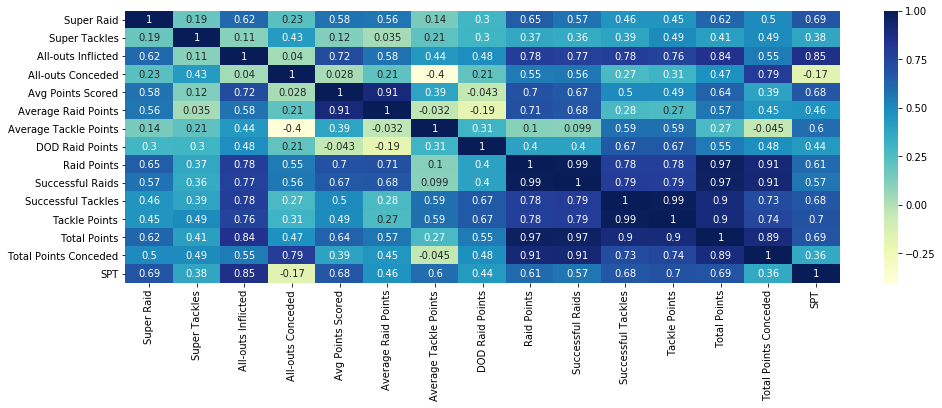

In [70]:
plt.figure(figsize = (16,5))
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [71]:
#plt.figure(figsize = (16,5))
#sns.pairplot(df)
#plt.show()

In [72]:
df.describe()

,Super Raid,Super Tackles,All-outs Inflicted,All-outs Conceded,Avg Points Scored,Average Raid Points,Average Tackle Points,DOD Raid Points,Raid Points,Successful Raids,Successful Tackles,Tackle Points,Total Points,Total Points Conceded,SPT
count,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000
mean,9.821429,15.357143,21.660714,21.660714,27.417143,17.916071,9.506071,69.285714,333.785714,266.214286,161.142857,175.982143,583.750000,583.750000,25.178571
std,4.663620,6.425598,8.965138,6.642225,2.844291,2.618552,1.198975,19.871143,102.841575,85.219228,45.765977,48.126912,167.096624,153.343613,14.388262
min,3.000000,5.000000,9.000000,12.000000,22.070000,13.140000,7.140000,30.000000,184.000000,134.000000,93.000000,100.000000,360.000000,397.000000,-1.000000
25%,7.000000,12.000000,15.000000,16.000000,25.587500,15.805000,8.707500,55.500000,250.750000,200.750000,121.250000,135.750000,443.500000,456.250000,13.750000
50%,9.500000,15.000000,20.500000,21.000000,27.215000,17.910000,9.490000,73.000000,330.000000,259.000000,158.500000,170.500000,532.500000,496.000000,25.500000
75%,12.000000,18.000000,26.250000,27.000000,28.962500,19.802500,10.250000,84.250000,411.250000,335.250000,186.000000,201.250000,712.000000,731.750000,33.250000
max,26.000000,34.000000,55.000000,36.000000,34.190000,24.500000,12.570000,119.000000,637.000000,487.000000,274.000000,289.000000,1050.000000,921.000000,79.000000


In [73]:
from sklearn.model_selection import train_test_split
X_train = df[['Super Raid','All-outs Inflicted','Raid Points','Total Points','Average Raid Points']]
y_train = df['Successful Raids']



In [74]:
X_train.head()

,Super Raid,All-outs Inflicted,Raid Points,Total Points,Average Raid Points
0,13,18,316,504,19.75
1,12,21,347,550,21.69
2,11,12,269,405,19.21
3,11,11,283,430,20.21
4,9,29,344,579,21.50


In [75]:
y_train.head()

0    253
1    270
2    204
3    213
4    270
Name: Successful Raids, dtype: int64

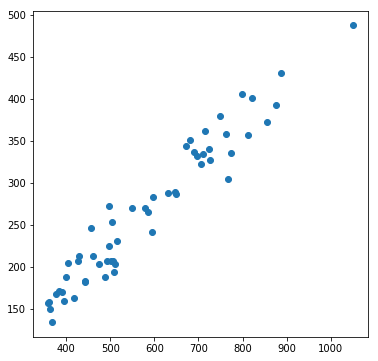

In [76]:
plt.figure(figsize=[6,6])
plt.scatter(df['Total Points'], df['Successful Raids'])
plt.show()

In [77]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train[['Total Points']])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [78]:
lr.params

const          -21.591358
Total Points     0.493029
dtype: float64

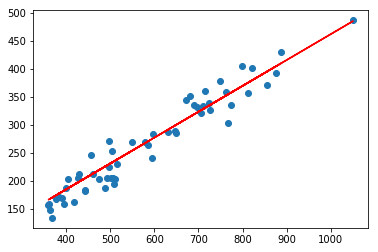

In [79]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], 0.127 + 0.462*X_train_lm.iloc[:, 1], 'r')
plt.show()

In [80]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:       Successful Raids   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     771.1
Date:                Mon, 30 Sep 2019   Prob (F-statistic):           1.19e-33
Time:                        15:30:40   Log-Likelihood:                -251.55
No. Observations:                  56   AIC:                             507.1
Df Residuals:                      54   BIC:                             511.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -21.5914     10.773     -2.004   

In [81]:
# Assign all the feature variables to X
X_train_lm = X_train[['Total Points', 'Raid Points']]

In [82]:
# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const          -10.428106
Total Points     0.035601
Raid Points      0.766541
dtype: float64

In [83]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:       Successful Raids   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     1842.
Date:                Mon, 30 Sep 2019   Prob (F-statistic):           1.06e-49
Time:                        15:30:41   Log-Likelihood:                -208.73
No. Observations:                  56   AIC:                             423.5
Df Residuals:                      53   BIC:                             429.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -10.4281      5.127     -2.034   

In [84]:
df.columns

Index([u'Season', u'Team', u'Super Raid', u'Super Tackles',
       u'All-outs Inflicted', u'All-outs Conceded', u'Avg Points Scored',
       u'Average Raid Points', u'Average Tackle Points', u'DOD Raid Points',
       u'Raid Points', u'Successful Raids', u'Successful Tackles',
       u'Tackle Points', u'Total Points', u'Total Points Conceded', u'SPT'],
      dtype='object')

In [85]:
X_train = df[['Super Raid','Super Tackles','All-outs Inflicted','All-outs Conceded','Avg Points Scored','Average Raid Points','Average Tackle Points','DOD Raid Points','Raid Points','Successful Tackles','Tackle Points','Total Points','Total Points Conceded']]

In [86]:
#Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.params

const                     24.624524
Super Raid                -1.758997
Super Tackles              1.336757
All-outs Inflicted         0.270251
All-outs Conceded          0.140599
Avg Points Scored       -230.060584
Average Raid Points      229.186105
Average Tackle Points    227.532554
DOD Raid Points           -0.050712
Raid Points                0.960191
Successful Tackles         1.745937
Tackle Points             -1.512427
Total Points              -0.094035
Total Points Conceded     -0.015916
dtype: float64

In [87]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:       Successful Raids   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     566.8
Date:                Mon, 30 Sep 2019   Prob (F-statistic):           9.13e-43
Time:                        15:30:43   Log-Likelihood:                -183.05
No. Observations:                  56   AIC:                             394.1
Df Residuals:                      42   BIC:                             422.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    24.62

In [88]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [90]:
#Dropping Variables
X = X_train.drop('All-outs Conceded', 1)

In [91]:
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [92]:
# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:       Successful Raids   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     627.2
Date:                Mon, 30 Sep 2019   Prob (F-statistic):           3.73e-44
Time:                        15:30:46   Log-Likelihood:                -183.11
No. Observations:                  56   AIC:                             392.2
Df Residuals:                      43   BIC:                             418.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    24.57

In [94]:
#Dropping Variables
X = X.drop('Total Points Conceded', 1)

# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:       Successful Raids   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     699.6
Date:                Mon, 30 Sep 2019   Prob (F-statistic):           1.39e-45
Time:                        15:30:47   Log-Likelihood:                -183.13
No. Observations:                  56   AIC:                             390.3
Df Residuals:                      44   BIC:                             414.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    21.89

In [96]:
#Dropping Variables
X = X.drop('DOD Raid Points', 1)

# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:       Successful Raids   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     782.8
Date:                Mon, 30 Sep 2019   Prob (F-statistic):           5.43e-47
Time:                        15:31:52   Log-Likelihood:                -183.28
No. Observations:                  56   AIC:                             388.6
Df Residuals:                      45   BIC:                             410.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    16.28

In [98]:
#Dropping Variables
X = X.drop('All-outs Inflicted', 1)

# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:       Successful Raids   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     881.2
Date:                Mon, 30 Sep 2019   Prob (F-statistic):           2.16e-48
Time:                        15:33:06   Log-Likelihood:                -183.53
No. Observations:                  56   AIC:                             387.1
Df Residuals:                      46   BIC:                             407.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     6.61

In [100]:
#Dropping Variables
X = X.drop('Super Tackles', 1)

# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:       Successful Raids   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     1004.
Date:                Mon, 30 Sep 2019   Prob (F-statistic):           7.99e-50
Time:                        15:34:12   Log-Likelihood:                -183.77
No. Observations:                  56   AIC:                             385.5
Df Residuals:                      47   BIC:                             403.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     8.26

In [103]:

#Dropping Variables
X = X.drop('Average Tackle Points', 1)

# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model
print(lr_2.summary())


                            OLS Regression Results                            
Dep. Variable:       Successful Raids   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     1157.
Date:                Mon, 30 Sep 2019   Prob (F-statistic):           3.05e-51
Time:                        15:37:32   Log-Likelihood:                -184.13
No. Observations:                  56   AIC:                             384.3
Df Residuals:                      48   BIC:                             400.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   8.3339    

In [105]:

#Dropping Variables
X = X.drop('Average Raid Points', 1)

# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model
print(lr_2.summary())


                            OLS Regression Results                            
Dep. Variable:       Successful Raids   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     1368.
Date:                Mon, 30 Sep 2019   Prob (F-statistic):           9.44e-53
Time:                        15:39:42   Log-Likelihood:                -184.34
No. Observations:                  56   AIC:                             382.7
Df Residuals:                      49   BIC:                             396.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  7.1273     11

In [107]:

#Dropping Variables
X = X.drop('Total Points', 1)

# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model
print(lr_2.summary())


                            OLS Regression Results                            
Dep. Variable:       Successful Raids   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     1658.
Date:                Mon, 30 Sep 2019   Prob (F-statistic):           2.81e-54
Time:                        15:41:06   Log-Likelihood:                -184.62
No. Observations:                  56   AIC:                             381.2
Df Residuals:                      50   BIC:                             393.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  4.0910     10

In [108]:

#Dropping Variables
X = X.drop('Avg Points Scored', 1)

# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model
print(lr_2.summary())


                            OLS Regression Results                            
Dep. Variable:       Successful Raids   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     2051.
Date:                Mon, 30 Sep 2019   Prob (F-statistic):           1.22e-55
Time:                        15:41:36   Log-Likelihood:                -185.46
No. Observations:                  56   AIC:                             380.9
Df Residuals:                      51   BIC:                             391.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -8.5538      3

# Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [111]:
y_train_price = lr_2.predict(X_train_lm)

Text(0.5,0,'Errors')

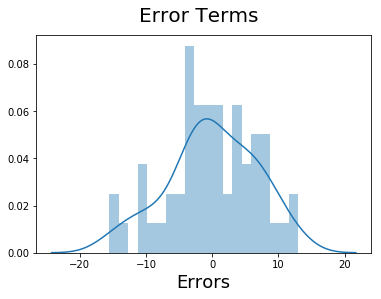

In [112]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

# Making Predictions Using the Final Model

In [131]:
df_test = pd.read_csv("E:\\ProKabaddi\\TeamStats\\TeamStats7.csv")

df_test = df_test.drop(["Unnamed: 0", "Season.1"], axis = 1)


In [133]:
y_test = df_test.pop('Successful Raids')
X_test = df_test

In [134]:
# Adding constant variable to test dataframe
X_test_m4 = sm.add_constant(X_test)

In [135]:
# Creating X_test_m4 dataframe by dropping variables from X_test_m4

X_test_m4 = X_test_m4.drop(["All-outs Conceded", "Total Points Conceded", "DOD Raid Points", "All-outs Inflicted", "Super Tackles","Average Tackle Points","Average Raid Points","Total Points","Avg Points Scored","SPT","Team","Season"], axis = 1)

In [136]:
X_test_m4

,const,Super Raid,Raid Points,Successful Tackles,Tackle Points
0,1.0,15,398,174,184
1,1.0,14,377,181,195
2,1.0,13,368,168,191
3,1.0,9,332,162,182
4,1.0,8,393,168,191
5,1.0,8,414,175,181
6,1.0,7,337,189,219
7,1.0,7,304,162,176
8,1.0,6,358,207,232
9,1.0,5,289,177,192


In [137]:
# Making predictions using the fourth model

y_pred_m4 = lr_2.predict(X_test_m4)

# Model Evaluation

Text(0,0.5,'y_pred')

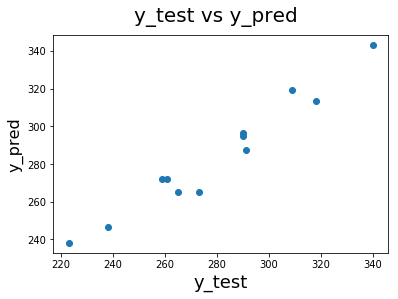

In [138]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_m4)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      


We can see that the equation of our best fitted line is:

$ SuccessfulRaid = 0.868 \times Raid Points + 0.342 \times Successful Tackles -  0.3128 \times Tackle Points - 2.0707 \times Super Raid $


From the above Linear Equation We can predict that which team has the highest Raid points in the current season 7 table is also highest Successful raids

# Final Predction : Dabang Delhi K.C.